# Calculate the Number of Parameters - Analysis for CNN Beamforming Paper

### Author: Zhanwen "Phil" Chen

This script computes the total number of weights and biases for each model (each k) and writes it into the `model_statistics.json` file.


## Methodology for analyzing the total number of weights

For each model (per `k`) directory, we create a new file called `model_statistics.json` to store static attributes for this model to cache results of frequent, unchanging analyses. The total number of weights, for example, is unchanging for a given model.




In [1]:
import sys
from glob import glob
from os.path import join, dirname, basename
import json

import torch
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from lib.utils import get_which_model_from_params_fname
from lib.lenet import LeNet

MODEL_PARAMS_FNAME = 'model_params.json'
ALT_MODEL_PARAMS_FNAME = 'model_params.txt'
SAVE_JSON_FNAME = 'model_metadata.json'


In [2]:
# Use glob to grab all model folders
MODELS_DIRECTORY_STRING = join('..', 'DNNs', '*_evaluated') # '../DNNS/*'
model_dirnames = glob(MODELS_DIRECTORY_STRING)


In [3]:
# For each model (per k) directory,
# 1. create a file called `model_statistics.json` if it doesn't exist.
# 2. calculate the number of parameters for this model

model_num_params = []

def get_num_weights(model_dirname):
    k_directory_string = join(model_dirname, 'k_*')
    k_dirnames = glob(k_directory_string)

    for k_dirname in k_dirnames:
        model_params_fname = join(k_dirname, MODEL_PARAMS_FNAME)
        alt_model_params_fname = join(k_dirname, ALT_MODEL_PARAMS_FNAME)
        try:
            model = get_which_model_from_params_fname(LeNet, model_params_fname)
        except:
            try:
                model = get_which_model_from_params_fname(LeNet, alt_model_params_fname)
            except Exception as e:
                continue
    #                 raise OSError('Trying to build model using alternative model params file .txt, but encountered error \'{}\''.format(e))

        try:
            model.load_state_dict(torch.load(join(k_dirname, 'model.dat'), map_location='cpu'))
        except RuntimeError as runtime_err:
            # PyTorch version error: unable to load batch_norm layers trained
            # using a version prior to 0.4.0. Unfortunately, we have to ignore
            # lots of models but oh well.
    #             print('Skipping after encountering runtime_err: {}'.format(runtime_err))
            continue
    #         except ZeroDivisionError as division_:
    #             print('Skipping after encountering runtime_err: {}'.format(runtime_err))
    #             continue



        # 1. check existence of 
        num_weights_and_biases = sum(param.numel() for param in model.parameters() \
                                   if param.requires_grad is True)
        with open(join(k_dirname, SAVE_JSON_FNAME), 'w') as outfile:
            json.dump({
                'num_weights_and_biases': num_weights_and_biases,
            }, outfile)


        model_num_params.append(num_weights_and_biases)
        print('total params for model {} of k = {} = {}'.format(basename(model_dirname), basename(k_dirname), num_weights_and_biases))
        print()
    

total params for model 20190104095442_25_evaluated of k = k_5 = 588829

total params for model 20190104095442_25_evaluated of k = k_4 = 588829

total params for model 20190104095442_25_evaluated of k = k_3 = 588829

total params for model 20181203090415_44_evaluated of k = k_5 = 82587

total params for model 20181203090415_44_evaluated of k = k_4 = 82587

total params for model 20181203090415_44_evaluated of k = k_3 = 82587

total params for model 20181025215535_69_evaluated of k = k_5 = 147771

total params for model 20181025215535_69_evaluated of k = k_4 = 147771

total params for model 20181025215535_69_evaluated of k = k_3 = 147771

total params for model 20181002150342_39_evaluated of k = k_5 = 195963

total params for model 20181002150342_39_evaluated of k = k_4 = 195963

total params for model 20181002150342_39_evaluated of k = k_3 = 195963

total params for model 20180928201821_23_evaluated of k = k_5 = 85098

total params for model 20180928201821_23_evaluated of k = k_4 = 8509

total params for model 20181025215535_98_evaluated of k = k_5 = 24933

total params for model 20181025215535_98_evaluated of k = k_4 = 24933

total params for model 20181025215535_98_evaluated of k = k_3 = 24933

total params for model 20181021132748_80_evaluated of k = k_5 = 393764

total params for model 20181021132748_80_evaluated of k = k_4 = 393764

total params for model 20181021132748_80_evaluated of k = k_3 = 393764

total params for model 20181018100714_50_evaluated of k = k_5 = 229578

total params for model 20181018100714_50_evaluated of k = k_4 = 229578

total params for model 20181018100714_50_evaluated of k = k_3 = 229578

total params for model 20181025215535_228_evaluated of k = k_5 = 105440

total params for model 20181025215535_228_evaluated of k = k_4 = 105440

total params for model 20181025215535_228_evaluated of k = k_3 = 105440

total params for model 20181021132748_27_evaluated of k = k_5 = 660852

total params for model 20181021132748_27_evaluated of k = k_4 = 

total params for model 20181025215535_488_evaluated of k = k_5 = 184991

total params for model 20181025215535_488_evaluated of k = k_4 = 184991

total params for model 20181025215535_488_evaluated of k = k_3 = 184991

total params for model 20181025215535_441_evaluated of k = k_5 = 439593

total params for model 20181025215535_441_evaluated of k = k_4 = 439593

total params for model 20181025215535_441_evaluated of k = k_3 = 439593

total params for model 20181218171733_149_evaluated of k = k_5 = 263765

total params for model 20181218171733_149_evaluated of k = k_4 = 263765

total params for model 20181218171733_149_evaluated of k = k_3 = 263765

total params for model 20181203090415_21_evaluated of k = k_5 = 468945

total params for model 20181203090415_21_evaluated of k = k_4 = 468945

total params for model 20181203090415_21_evaluated of k = k_3 = 468945

total params for model 20181203090415_5_evaluated of k = k_5 = 579607

total params for model 20181203090415_5_evaluated of k =

total params for model 20180718164411_6_evaluated of k = k_5 = 113849

total params for model 20180718164411_6_evaluated of k = k_4 = 113849

total params for model 20180718164411_6_evaluated of k = k_3 = 113849

total params for model 20181016023040_48_evaluated of k = k_5 = 110219

total params for model 20181016023040_48_evaluated of k = k_4 = 110219

total params for model 20181016023040_48_evaluated of k = k_3 = 110219

total params for model 20181002150342_14_evaluated of k = k_5 = 56927

total params for model 20181002150342_14_evaluated of k = k_4 = 56927

total params for model 20181002150342_14_evaluated of k = k_3 = 56927

total params for model 20180807104900_19_evaluated of k = k_5 = 220931

total params for model 20180807104900_19_evaluated of k = k_4 = 220931

total params for model 20180807104900_19_evaluated of k = k_3 = 220931

total params for model 20181016023040_32_evaluated of k = k_5 = 967469

total params for model 20181016023040_32_evaluated of k = k_4 = 967469

total params for model 20180718164411_47_evaluated of k = k_5 = 415319

total params for model 20180718164411_47_evaluated of k = k_4 = 415319

total params for model 20180718164411_47_evaluated of k = k_3 = 415319

total params for model 20181203090415_34_evaluated of k = k_5 = 379879

total params for model 20181203090415_34_evaluated of k = k_4 = 379879

total params for model 20181203090415_34_evaluated of k = k_3 = 379879

total params for model 20180807104900_44_evaluated of k = k_5 = 120854

total params for model 20180807104900_44_evaluated of k = k_4 = 120854

total params for model 20180807104900_44_evaluated of k = k_3 = 120854

total params for model 20181002150342_49_evaluated of k = k_5 = 61902

total params for model 20181002150342_49_evaluated of k = k_4 = 61902

total params for model 20181002150342_49_evaluated of k = k_3 = 61902

total params for model 20180801163205_5_evaluated of k = k_5 = 206067

total params for model 20180801163205_5_evaluated of k = k_4 = 20606

total params for model 20181203090415_82_evaluated of k = k_3 = 202001

total params for model 20181218171733_93_evaluated of k = k_5 = 50326

total params for model 20181218171733_93_evaluated of k = k_4 = 50326

total params for model 20181218171733_93_evaluated of k = k_3 = 50326

total params for model 20181025215535_390_evaluated of k = k_5 = 87499

total params for model 20181025215535_390_evaluated of k = k_4 = 87499

total params for model 20181025215535_390_evaluated of k = k_3 = 87499

total params for model 20181025215535_445_evaluated of k = k_5 = 89611

total params for model 20181025215535_445_evaluated of k = k_4 = 89611

total params for model 20181025215535_445_evaluated of k = k_3 = 89611

total params for model 20181025215535_323_evaluated of k = k_5 = 212742

total params for model 20181025215535_323_evaluated of k = k_4 = 212742

total params for model 20181025215535_323_evaluated of k = k_3 = 212742

total params for model 20190104095442_153_evaluated of k = k_5 =

total params for model 20181021132748_84_evaluated of k = k_5 = 486145

total params for model 20181021132748_84_evaluated of k = k_4 = 486145

total params for model 20181021132748_84_evaluated of k = k_3 = 486145

total params for model 20181025215535_55_evaluated of k = k_5 = 84795

total params for model 20181025215535_55_evaluated of k = k_4 = 84795

total params for model 20181025215535_55_evaluated of k = k_3 = 84795

total params for model 20181016023040_23_evaluated of k = k_5 = 571709

total params for model 20181016023040_23_evaluated of k = k_4 = 571709

total params for model 20181016023040_23_evaluated of k = k_3 = 571709

total params for model 20181203090415_16_evaluated of k = k_5 = 116485

total params for model 20181203090415_16_evaluated of k = k_4 = 116485

total params for model 20181203090415_16_evaluated of k = k_3 = 116485

total params for model 20181002150342_11_evaluated of k = k_5 = 48371

total params for model 20181002150342_11_evaluated of k = k_4 = 4837

total params for model 20180727225755_12_evaluated of k = k_5 = 104850

total params for model 20180727225755_12_evaluated of k = k_4 = 104850

total params for model 20180727225755_12_evaluated of k = k_3 = 104850

total params for model 20181025215535_251_evaluated of k = k_5 = 85968

total params for model 20181025215535_251_evaluated of k = k_4 = 85968

total params for model 20181025215535_251_evaluated of k = k_3 = 85968

total params for model 20181025215535_471_evaluated of k = k_5 = 11773

total params for model 20181025215535_471_evaluated of k = k_4 = 11773

total params for model 20181025215535_471_evaluated of k = k_3 = 11773

total params for model 20181018100714_3_evaluated of k = k_5 = 113224

total params for model 20181018100714_3_evaluated of k = k_4 = 113224

total params for model 20181018100714_3_evaluated of k = k_3 = 113224

total params for model 20180928201821_43_evaluated of k = k_5 = 57303

total params for model 20180928201821_43_evaluated of k = k_4 = 5730

total params for model 20181218171733_5_evaluated of k = k_5 = 276331

total params for model 20181218171733_5_evaluated of k = k_4 = 276331

total params for model 20181218171733_5_evaluated of k = k_3 = 276331

total params for model 20181025215535_168_evaluated of k = k_5 = 58043

total params for model 20181025215535_168_evaluated of k = k_4 = 58043

total params for model 20181025215535_168_evaluated of k = k_3 = 58043

total params for model 20181218171733_111_evaluated of k = k_5 = 143980

total params for model 20181218171733_111_evaluated of k = k_4 = 143980

total params for model 20181218171733_111_evaluated of k = k_3 = 143980

total params for model 20181025215535_40_evaluated of k = k_5 = 132296

total params for model 20181025215535_40_evaluated of k = k_4 = 132296

total params for model 20181025215535_40_evaluated of k = k_3 = 132296

total params for model 20181002150342_10_evaluated of k = k_5 = 86504

total params for model 20181002150342_10_evaluated of k = k_4 = 8

## Plot Distribution of Number of Parameters

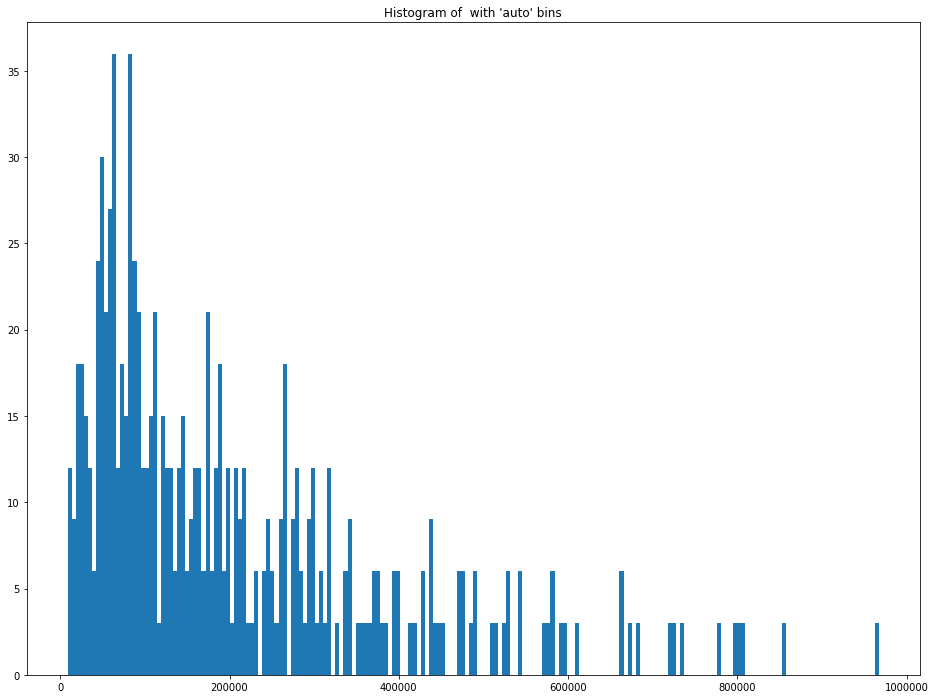

In [4]:
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),
#                rng.normal(loc=5, scale=2, size=1000)))
# plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.figure(figsize=(16,12))
# plt.hist(model_num_params, bins='auto')  # arguments are passed to np.histogram
plt.hist(model_num_params, bins=200)  # arguments are passed to np.histogram
plt.title("Histogram of  with 'auto' bins")
plt.show()

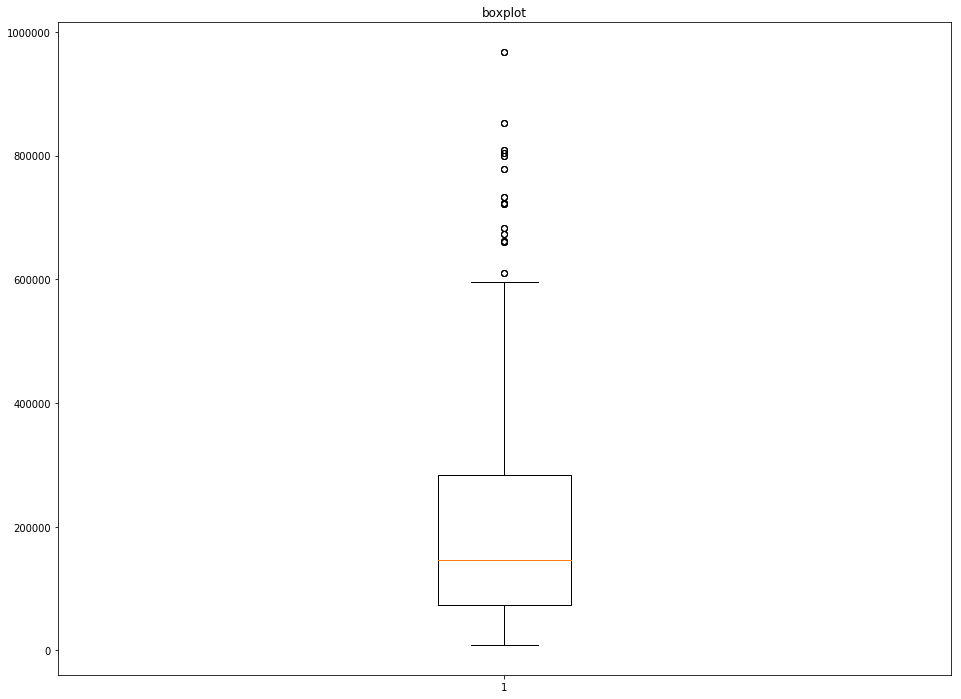

In [5]:
plt.figure(figsize=(16,12))
# plt.hist(model_num_params, bins='auto')  # arguments are passed to np.histogram
plt.boxplot(model_num_params)  # arguments are passed to np.histogram
plt.title('boxplot')
plt.show()